In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import LabelEncoder

In [24]:
np.random.seed(42)
random.seed(42)

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')

<ipython-input-26-4e4015fcbf94>:1: DtypeWarning: Columns (364,365,366,399,415,804,836,837,924,1240,1257,1486,3094,3168,3169,3341,3342,3344,3345,3347,3350,3352) have mixed types. Specify dtype option on import or set low_memory=False.
  vdem = pd.read_csv('/content/drive/MyDrive/V-Dem-CY-Full+Others-v14.csv')


In [27]:
vdem.keys()

Index(['country_name', 'country_text_id', 'country_id', 'year',
       'historical_date', 'project', 'historical', 'histname', 'codingstart',
       'codingend',
       ...
       'e_mipopula', 'e_miurbani', 'e_pefeliex', 'e_wb_pop', 'e_pechmor',
       'e_miinteco', 'e_civil_war', 'e_miinterc', 'e_pt_coup',
       'e_pt_coup_attempts'],
      dtype='object', length=4607)

In [28]:
keys = list(vdem.keys())
len(keys)

4607

In [29]:
cleaned_keys = []
for k in keys:
    if ('code' not in k) and ('_sd' not in k) and ('_3C' not in k) and ('_4C' not in k) and ('_5C' not in k):
        if ('_mean' not in k) and ('_nr' not in k) and ('_osp' not in k) and ('_pct' not in k) and ('_ord' not in k):
            if ('_mode' not in k):
                cleaned_keys.append(k)

In [30]:
len(cleaned_keys)

1060

In [31]:
nr_keys = [k for k in keys if '_nr' in k]

In [32]:
# Create weight columns for each feature that has an associated _nr column
for nr_col in nr_keys:
    feat_col = nr_col.replace('_nr', '')
    weight_col = feat_col + '_weight'
    if feat_col in vdem.columns:
        vdem[weight_col] = np.minimum(vdem[nr_col] / 3, 1)  # Cap the weight at 1


<ipython-input-32-d8a126c870ce>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vdem[weight_col] = np.minimum(vdem[nr_col] / 3, 1)  # Cap the weight at 1
<ipython-input-32-d8a126c870ce>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  vdem[weight_col] = np.minimum(vdem[nr_col] / 3, 1)  # Cap the weight at 1
<ipython-input-32-d8a126c870ce>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using

In [33]:
test = vdem[(vdem['year'] > 1960)]
test = test[test['e_wb_pop'] > 50_000_000]
test[nr_keys].describe()

,v2eldonate_nr,v2elpubfin_nr,v2elembaut_nr,v2elembcap_nr,v2elmulpar_nr,v2elrgstry_nr,v2elvotbuy_nr,v2elirreg_nr,v2elintim_nr,v2elpeace_nr,...,v2medentrain_nr,v2edscpatriot_nr,v2edscpatriotcb_nr,v2edscextracurr_nr,v2edtequal_nr,v2temonitor_nr,v2edteunion_nr,v2edteunionindp_nr,v2edtehire_nr,v2edtefire_nr
count,1252.000000,1252.000000,1252.000000,1252.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,...,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,10.214058,10.191693,9.980831,9.805911,9.517544,9.172515,9.470760,9.453216,9.456140,9.269006,...,6.694195,6.850368,7.014718,6.804579,6.816844,6.531480,6.843009,6.260016,6.724448,6.699918
std,5.274907,5.301765,5.207258,5.178959,4.954158,4.967585,4.787327,4.796978,4.831726,4.744267,...,4.195862,4.012625,4.149590,4.091256,4.117443,3.928216,4.175748,4.178242,4.128277,4.161714
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000
75%,14.000000,14.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,9.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,9.000000,10.000000,10.000000
max,30.000000,31.000000,30.000000,29.000000,23.000000,24.000000,25.000000,24.000000,24.000000,23.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000


In [34]:
vdem_pop = vdem.dropna(subset=['e_wb_pop'])[cleaned_keys]

In [35]:
vdem_pop.describe()

,country_id,year,project,historical,codingstart,codingend,codingstart_contemp,codingend_contemp,codingstart_hist,codingend_hist,...,e_mipopula,e_miurbani,e_pefeliex,e_wb_pop,e_pechmor,e_miinteco,e_civil_war,e_miinterc,e_pt_coup,e_pt_coup_attempts
count,10182.000000,10182.000000,10182.000000,10182.000000,10182.000000,10182.0,10182.00000,10182.0,4292.000000,4292.000000,...,5.818000e+03,5563.000000,5714.000000,1.018200e+04,10120.000000,6297.000000,6582.000000,6297.000000,9303.000000,9303.000000
mean,95.646631,1992.113534,0.006678,0.421528,1867.189256,2023.0,1910.03958,2023.0,1801.283085,1922.962721,...,2.667720e+04,0.337113,62.547123,3.261888e+07,83.171369,0.055582,0.080978,0.137208,0.022036,0.044502
std,56.774947,18.123919,0.115385,0.493828,61.421139,0.0,22.02784,0.0,21.981895,11.283326,...,1.033311e+05,0.227345,12.668682,1.193799e+08,83.675067,0.229131,0.272823,0.344094,0.154654,0.236340
min,3.000000,1960.000000,0.000000,0.000000,1789.000000,2023.0,1900.00000,2023.0,1789.000000,1918.000000,...,4.166200e+01,0.044000,30.810000,4.170000e+04,1.470000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1977.000000,0.000000,0.000000,1789.000000,2023.0,1900.00000,2023.0,1789.000000,1920.000000,...,2.031052e+03,0.182000,51.439250,2.367802e+06,17.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.000000,1993.000000,0.000000,0.000000,1900.000000,2023.0,1900.00000,2023.0,1789.000000,1920.000000,...,5.846211e+03,0.302000,64.786000,7.179500e+06,51.300000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,140.000000,2008.000000,0.000000,1.000000,1903.000000,2023.0,1911.00000,2023.0,1809.000000,1920.000000,...,1.532781e+04,0.414500,73.585750,2.129082e+07,127.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,210.000000,2022.000000,2.000000,1.000000,2011.000000,2023.0,2011.00000,2023.0,1878.000000,2010.000000,...,1.262645e+06,2.430000,84.580000,1.417173e+09,423.000000,1.000000,1.000000,1.000000,2.000000,4.000000


In [37]:
def top_correlations(base_df, column: str):

    df = base_df.dropna(subset=[column])
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")

    df = df.select_dtypes(include=["number"])

    correlations = df.corr()[column].drop(labels=[column])  #exclude self-correlation
    top_correlations = correlations.abs().sort_values(ascending=False)
    top_100 = top_correlations.head(100).index.tolist()

    return top_100, correlations


def print_correlations(top, corr_values, num, count_flag=0):
    filtered_top = []
    for col in top[:num]:
        if vdem[col].count() > count_flag:
            print(f"{col}: {corr_values[col]:.4f};                    " + "Count: " + str(vdem[col].count()))
            filtered_top.append(col)
    return filtered_top

def imputing_model(base_df, column: str, num_feats=500, split = 5, impute = True):
    if len(base_df[column].unique()) > 10:
        model = RandomForestRegressor
        metric = r2_score
        alpha_mod = 0.01
    else:
        if impute:
            model = RandomForestClassifier
        else:
            model = DecisionTreeClassifier
        metric = accuracy_score
        alpha_mod = 0


    df = base_df.dropna(subset=[column])



    top, corrs = top_correlations(base_df, column)
    filtered_top = print_correlations(top, corrs, 500, 15000)

     # Identify weight columns for selected features
    weight_cols = [feat + '_weight' for feat in filtered_top if feat + '_weight' in df.columns]

    X = df[filtered_top[:num_feats]]
    y = df[column]

    # Apply weights to the features
    sample_weights = df[weight_cols] if weight_cols else None

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = model(min_samples_split= split, random_state=42) if model is RandomForestRegressor else model(min_samples_split=15, random_state=42)

    if sample_weights is not None:
        clf.fit(X_train, y_train, sample_weight=sample_weights.loc[X_train.index].mean(axis=1))
    else:
        clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    accuracy = metric(y_test, y_pred)
    print("Train Accuracy:", metric(y_train, clf.predict(X_train)))
    print("Test Accuracy:", accuracy)
    plt.scatter(y_test, y_pred, alpha=0.01 + alpha_mod)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted Values")
    plt.show()

    print("Importances for", column)

    importances = clf.feature_importances_
    std = np.std([clf.feature_importances_ for _ in range(100)], axis=0)
    features = X.columns

    indices = np.argsort(importances)[-30:][::-1]
    top_features = features[indices]
    top_importances = importances[indices]
    top_std = std[indices]
    plt.figure(figsize=(16, 12))
    plt.barh(top_features, top_importances, xerr=top_std, align='center')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

    return clf, filtered_top, corrs

v2x_polyarchy: -0.8602;                    Count: 26595
v2x_libdem: -0.8559;                    Count: 25350
v2x_accountability: -0.8455;                    Count: 19362
v2x_EDcomp_thick: -0.8420;                    Count: 26771
v2x_liberal: -0.8392;                    Count: 26085
v2x_mpi: -0.8391;                    Count: 26595
v2x_delibdem: -0.8382;                    Count: 19308
v2x_partipdem: -0.8313;                    Count: 25982
v2x_api: -0.8297;                    Count: 26595
v2x_regime_amb: -0.8239;                    Count: 19401
e_polity2: -0.8236;                    Count: 17156
v2xnp_pres: 0.8235;                    Count: 26767
v2x_civlib: -0.8205;                    Count: 27303
v2x_clpol: -0.8186;                    Count: 27393
v2x_diagacc: -0.8155;                    Count: 19362
v2xel_frefair: -0.8137;                    Count: 27612
v2caassemb: -0.8133;                    Count: 18995
v2x_freexp: -0.8132;                    Count: 27247
v2elfrfair: -0.8097;    

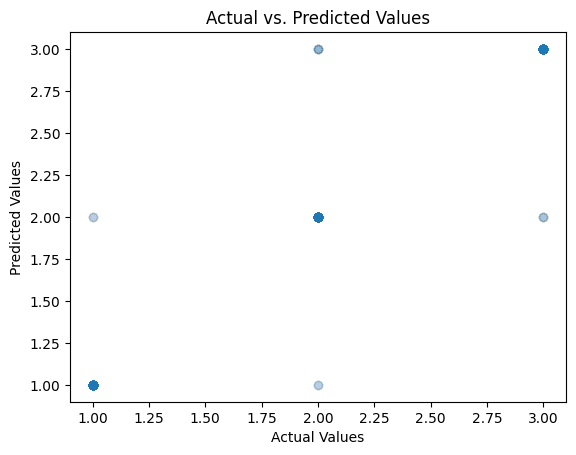

Importances for e_fh_status


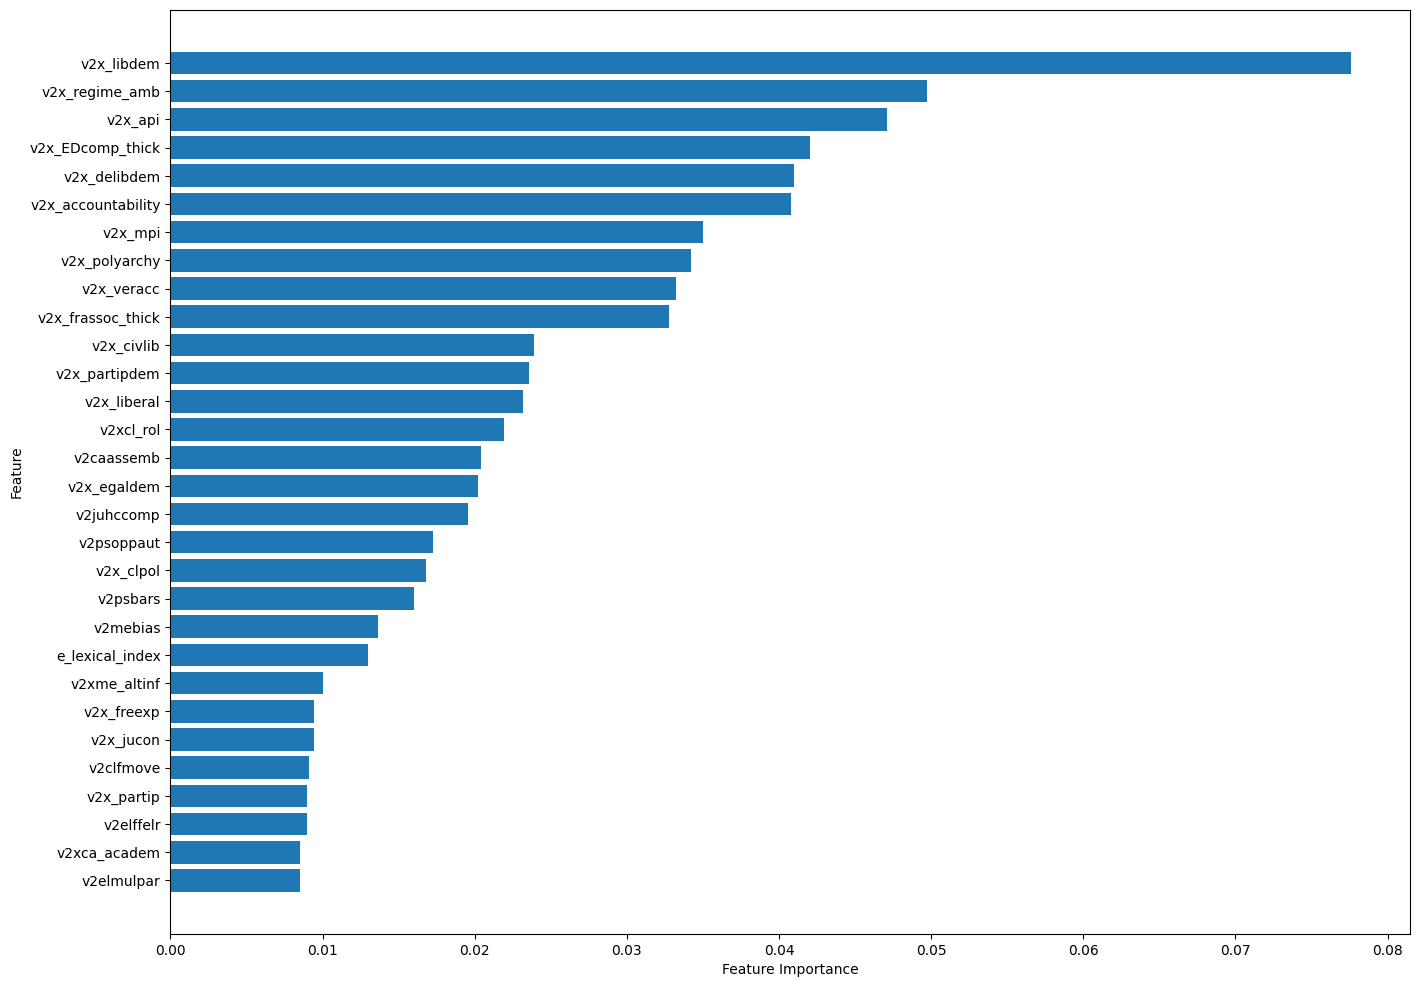

In [38]:
status_model, status_top, status_corrs = imputing_model(vdem_pop, 'e_fh_status', split=2)

v2x_libdem: -0.8948;                    Count: 25350
v2x_polyarchy: -0.8910;                    Count: 26595
v2x_accountability: -0.8875;                    Count: 19362
v2x_civlib: -0.8787;                    Count: 27303
v2x_delibdem: -0.8779;                    Count: 19308
v2x_liberal: -0.8752;                    Count: 26085
v2x_partipdem: -0.8742;                    Count: 25982
v2x_mpi: -0.8708;                    Count: 26595
v2x_diagacc: -0.8687;                    Count: 19362
v2x_EDcomp_thick: -0.8637;                    Count: 26771
v2xcl_rol: -0.8624;                    Count: 27616
v2caassemb: -0.8599;                    Count: 18995
v2x_freexp: -0.8591;                    Count: 27247
v2x_clpol: -0.8586;                    Count: 27393
v2x_egaldem: -0.8582;                    Count: 19308
v2x_api: -0.8576;                    Count: 26595
v2x_regime_amb: -0.8535;                    Count: 19401
v2x_freexp_altinf: -0.8503;                    Count: 27198
v2xca_academ: -0.8

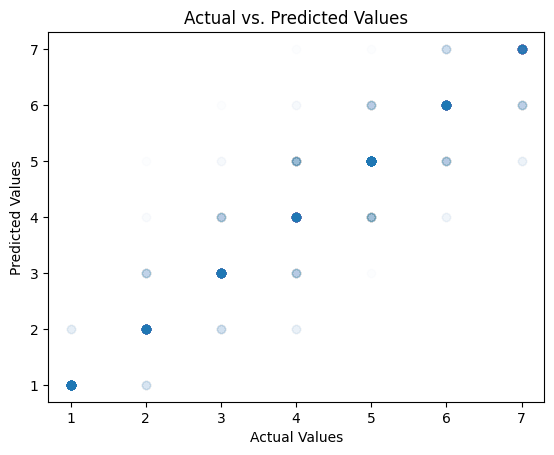

Importances for e_fh_cl


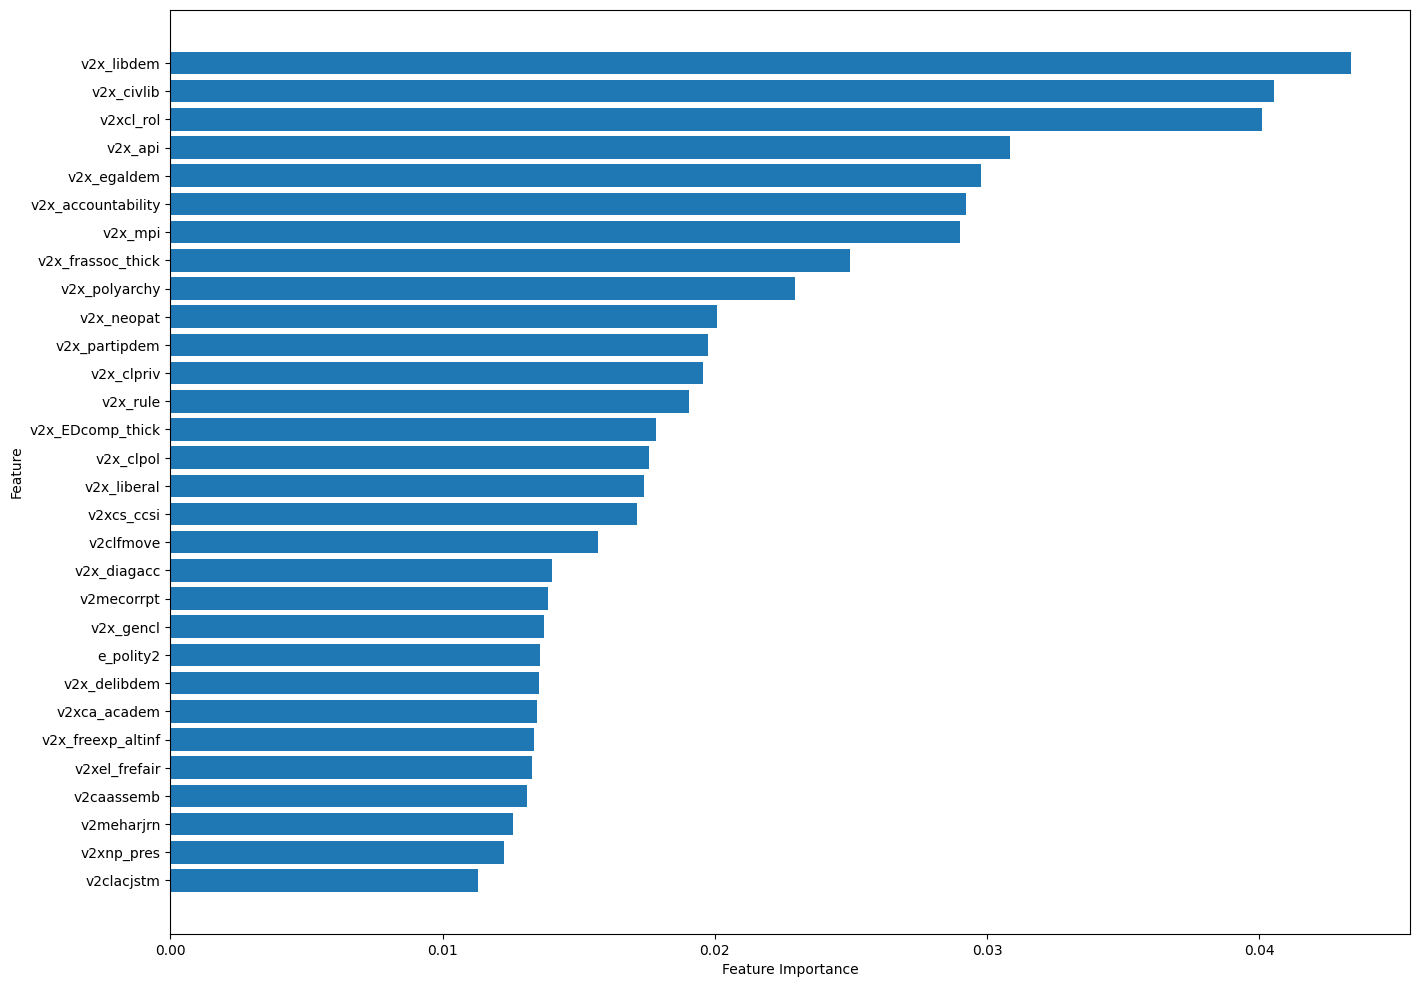

In [39]:
cl_model, cl_top, cl_corrs = imputing_model(vdem_pop, 'e_fh_cl')

v2x_polyarchy: -0.9146;                    Count: 26595
v2x_libdem: -0.9051;                    Count: 25350
v2x_EDcomp_thick: -0.9003;                    Count: 26771
v2x_accountability: -0.8947;                    Count: 19362
v2x_mpi: -0.8908;                    Count: 26595
v2x_delibdem: -0.8883;                    Count: 19308
e_polity2: -0.8853;                    Count: 17156
v2x_api: -0.8838;                    Count: 26595
v2x_regime_amb: -0.8837;                    Count: 19401
v2x_partipdem: -0.8836;                    Count: 25982
v2x_liberal: -0.8825;                    Count: 26085
v2x_regime: -0.8674;                    Count: 19401
v2xel_frefair: -0.8668;                    Count: 27612
e_democracy_omitteddata: -0.8662;                    Count: 17631
e_boix_regime: -0.8653;                    Count: 17855
v2xnp_pres: 0.8653;                    Count: 26767
e_lexical_index: -0.8634;                    Count: 26721
v2x_clpol: -0.8627;                    Count: 27393
v2x_

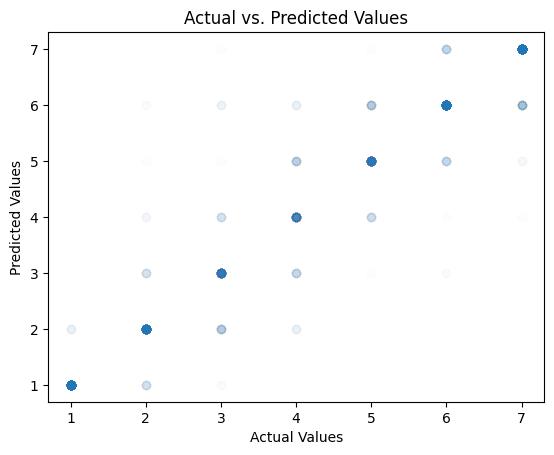

Importances for e_fh_pr


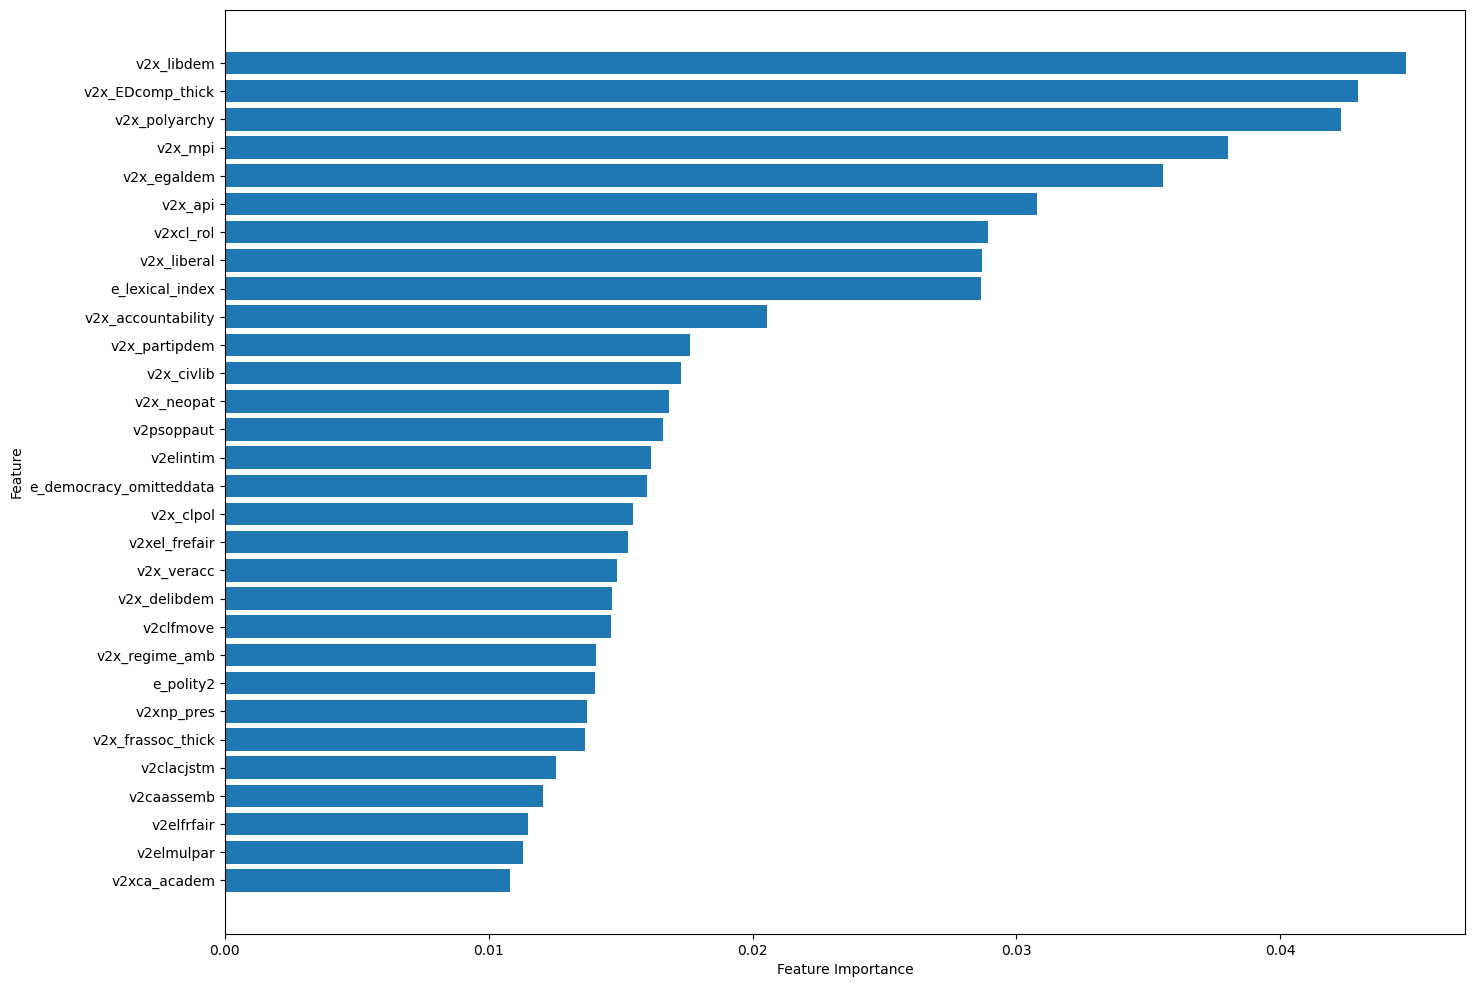

In [40]:
pr_model, pr_top, pr_corrs = imputing_model(vdem_pop, 'e_fh_pr')

In [ ]:
vdem_uds = vdem.dropna(subset=['e_uds_median'])[cleaned_keys]
vdem_uds.describe()

In [ ]:
uds_model, uds_top, uds_corrs = imputing_model(vdem_pop, 'e_uds_median')

In [ ]:
vdem_pop['pred_status'] = status_model.predict(vdem_pop[status_top])
vdem_pop['pred_cl'] = cl_model.predict(vdem_pop[cl_top])
vdem_pop['pred_pr'] = pr_model.predict(vdem_pop[pr_top])
vdem_pop['pred_uds'] = uds_model.predict(vdem_pop[uds_top])

In [ ]:
vdem_pop.to_csv('vdem_pop_preds.csv')